<a href="https://colab.research.google.com/github/LiuLynn249/titanic-analysis/blob/main/Day03_%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC_%E9%81%8B%E7%94%A8%E8%B3%87%E6%96%99%E8%88%87%E7%89%B9%E5%BE%B5%E5%84%AA%E5%8C%96%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

在第一步的建立 Baseline 過程中，在不要求準確度的情況下可以利用簡單的方法進行填補與型態調整，接下來要試著嘗試進一步優化分析的結果。今天我們希望著重在「資料」與「特徵」的觀點來進行探索與優化，運用到「資料探索與視覺化」與「特徵工程」兩個重要的能力。接下來有幾個任務請你完成，將答案以文字或註解方式補充於程式碼中：

1. 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？

（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？

3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。

4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。

5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

（Hint: 可以參考 【進階分析】鐵達尼生存預測 - 手把手資料分析實戰教學、Python與資料分析 5-入門級競賽分析-鐵達尼號）



In [49]:
import pandas as pd
import seaborn as sns

In [53]:
df_train=pd.read_csv('https://raw.githubusercontent.com/LiuLynn249/titanic-analysis/main/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df_test=pd.read_csv('https://raw.githubusercontent.com/LiuLynn249/titanic-analysis/main/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


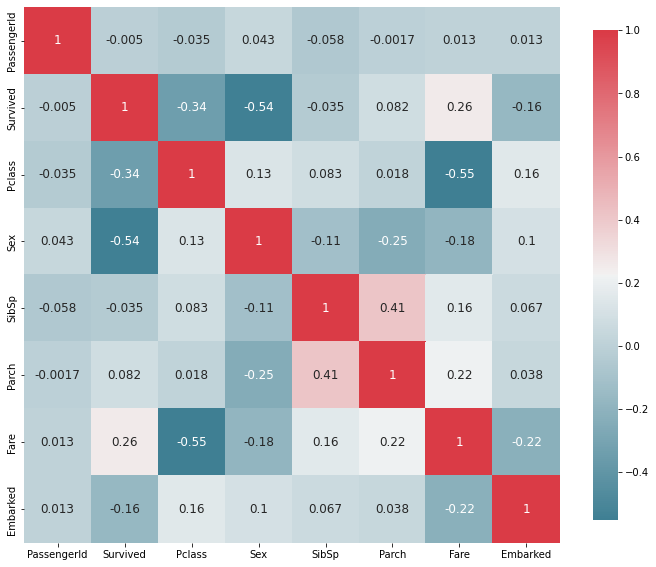

In [51]:
#延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)


#看熱力圖，找出在survived欄位上，對應到旁邊欄位的數值越大，則表示最相關


In [54]:
#請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
#Ans:
#PassengerId、name，唯一值，對分析沒有用
#Ticket、Cabin，沒有特別意義的數字
df_train.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [55]:
#請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
df_train2=df_train
df_train2['Age_mode']=df_train2['Age'].fillna(df_train2['Age'].mode)
df_train2['Age_mediam']=df_train2['Age'].fillna(df_train2['Age'].median)
df_train2['Age_mean']=df_train2['Age'].fillna(df_train2['Age'].mean)
df_train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mode,Age_mediam,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0


In [57]:
#請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train2['Sex2'] = labelencoder.fit_transform(df_train2['Sex'])
df_train2['Embarked2'] = labelencoder.fit_transform(df_train2['Embarked'])
df_train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mode,Age_mediam,Age_mean,Sex2,Embarked2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,22.0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,38.0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,26.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,35.0,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,35.0,1,2


In [ ]:
# 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。
#（Hint: 可以參考 【進階分析】鐵達尼生存預測 - 手把手資料分析實戰教學、Python與資料分析 5-入門級競賽分析-鐵達尼號）
